# Background

First, let's refresh our knowledge on radiactive decay. Consider a sample of $N_0$ radioactive carbon-14 nuclei. The half-life $t_{1/2}$ of carbon-14 is about $t_{1/2} = 5730$ years, i.e., every 5730 years, half of the nuclei has decayed. So the number of left over radioactive nuclei is $N_{1}=\frac{N_0}{2}$. If one waits another 5730 years, half of the left over nuclei would decay, hence the left over nuclei would be $N_{2} = \frac{N_1}{2} = \frac{N_0}{4}$, and so on. 

Geometric sequences is the math tool that we use to describe the decay. Let $k$ be the number of half-life period (that is the time that have passed after $k$ period is $t_{k/2} = k\times t_{1/2}$). The number of carbon-14 nuclei after $k$ periods is then:
$$
N_{k} = \frac{N_0}{2^{k}}\ .
$$
Equivalently, if we know the number of nuclei after $k$ period, we can calculate the number of nuclei in the subsequent period $k+1$ using the following recursive relation:
$$
N_{k+1} = \frac{N_k}{2}\ .
$$
In what's next, we will print the list of atoms after $k$ period. Then, we will plot the graph that represents the time-evolution of the population of radioactive nuclei. Finally, we can generalize the model using the exponential function. 

## Print the list of numbers of radioactive nuclei

Let's consider $N_0 = 10^{10}$. We can use the recursive relation to find the numbers of nuclei after 10 periods

In [ ]:
u=10**6
n=10
for k in range(n+1):
  print(k,u)
  u=u*0.5
  k=k+1


0 1000000
1 500000.0
2 250000.0
3 125000.0
4 62500.0
5 31250.0
6 15625.0
7 7812.5
8 3906.25
9 1953.125
10 976.5625


Instead of using the recursive relation, we could use the general term. 

In [ ]:
u0=10**6
n=10
for k in range(n+1):
  print(k,u0*(1/2)**k)
  k=k+1

0 1000000.0
1 500000.0
2 250000.0
3 125000.0
4 62500.0
5 31250.0
6 15625.0
7 7812.5
8 3906.25
9 1953.125
10 976.5625


We get exactly the same numbers. Great.

Notice that we can also use the while loop instead of the for loop. I personally prefer the for, but I know some students prefer the while. I guess people have different ways of thinking and the while loop or the for loop can suit people differently. Try it and see what suits you best. 

In [ ]:
u=10**6
n=10
k=0
while k<=n:
  print(k,u)
  u=u*0.5
  k=k+1

0 1000000
1 500000.0
2 250000.0
3 125000.0
4 62500.0
5 31250.0
6 15625.0
7 7812.5
8 3906.25
9 1953.125
10 976.5625


Now, we can also determine the period at which the number of nuclei becomes lesser than 1000. In this case, a while loop works fine.  

In [ ]:
u=10**6
k=0
while u>=1000:
  u=u*0.5
  k=k+1
print(k)

10


it is consistent with the list above, as for k=10 we found $N=976.5625<1000$. 

## Plotting the graph 

In this section, we are going to plot the graph representing the number of nuclei as a function of the period $k$ (I recall that $k$ stands for the number of half-life period). 

As we did before, we should import the function pyplot from the library matplotlib. Then, we create a list collecting all the values and we plot the list. 

First, let's plot the list of values as a function of the number $k$ of half-life. 

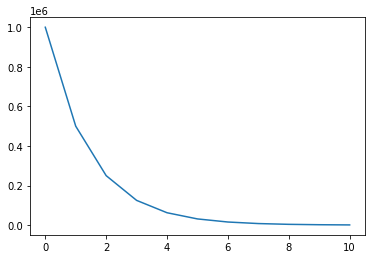

In [ ]:
from matplotlib import pyplot as plt

u=1000000
n=10
L=[]
for k in range(n+1):
  L.append(u)
  u=u*0.5
  k=k+1
plt.plot(L)

We could also plot the list of numbers as a function of the time $t_{k/2}=k\times t_{1/2}$. To do this, we should create another list to collect the values of the time for each period $k$ and plot the list of numbers of nuclei as a function of the list of times. 

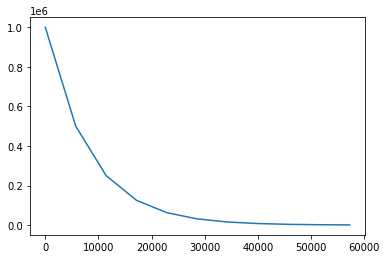

In [ ]:
from matplotlib import pyplot as plt

u=1000000
t12=5730
n=10
t=0
L=[]
T=[]
for k in range(n+1):
  L.append(u)
  T.append(t)
  u=u*0.5
  t=t+t12
  k=k+1
plt.plot(T,L)

We can also scatterplot the list:

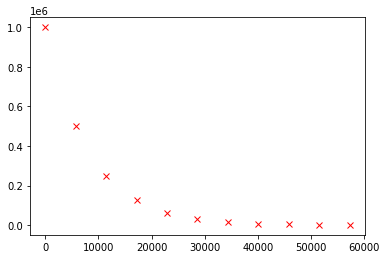

In [ ]:
plt.plot(T,L,'rx')

Or using dots and superimpose the line and the dot graphs:

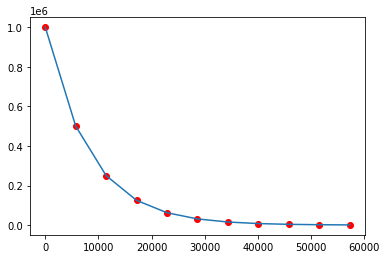

In [ ]:
plt.plot(T,L,'ro')
plt.plot(T,L)

Another way of plotting the graph is to define a function: 

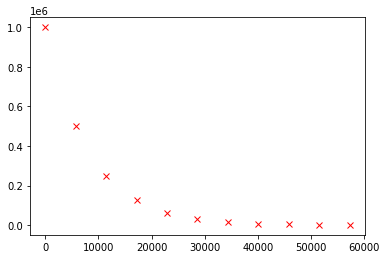

In [ ]:
from matplotlib import pyplot as plt
import math
def liste(N0,t12,n):
    u=N0
    t=0
    L=[]
    T=[]
    for k in range(n+1):
        L.append(u)
        T.append(t)
        t=t+t12
        u=0.5*u
        k=k+1
    return plt.plot(T,L, 'rx')
    
liste(10**6,5730,10)

That's kind of nice because we can change the parameters easily in the functions. For instance, if I want to plot the graph for the Uranium–lead dating, for which the half-life is about 4.47 billion years. 

## Problems

**Problem 1:** We want to estimate the age of a prehistorical human skeleton using carbon-14 dating. In a sample of the skeleton, we measure that the number of carbon-14 atoms is about 10 times greater than the the number measured in a living human's bone. 
1. Write a code to graph the ratio of carbon-14 atoms in human skeleton as a function of time (we'll take $N_0=1$). 
2. Write a program to find a lower and a upper bound of the number of half-life corresponding to the skeleton. 
3. Using the line graph, give a rough approximation of the age of the skeleton.

# Continuous model and exponential function

## Continuous model - ODE - exponential function 

The discrete model is pretty relevant for time that are not geological times. Imagine we want to date rocks or stuff like that, that can be as old as Earth. Well, in this case we have to use nuclei that decay not too fast and, I'd say, pretty slowly to make sure we don't have too large uncertainty. But even worst, we have to use nuclei for which the half-life is about the age of the earth! In this case, it is clear that the dicrete model is pretty useless, and we need something a bit more accurate if we want to say something interesting for our lovely geologists..  

Consider the Uranium–lead dating. The half-life is about 4.47 billion years, which is about the age of the Earth. The continuous model consists of using differential equations instead of the recursive formula we found above: 
$
N_{k+1} = \frac{1}{2}N_{k}
$
Let's first rewrite the relation as follows:
$$
N_{k+1}-N_{k} = -\frac{1}{2}N_{k}
$$

Well, it's pretty much the same, except that we take a limit as time goes to zero:
$$
\frac{dN}{dt} = \lim_{\delta t\rightarrow 0}\frac{N(t+\delta t)-N(t)}{\delta t}\ ,
$$
and that we say that the rate of change of $N(t)$, i.e., $\frac{dN}{dt}$ is proportional to $N(t)$:
$$
\frac{dN}{dt} = -\alpha N\ ,
$$
where $\alpha$ is the decay rate. The solution of the equation (assuming that $N(0)=N_0$) is:
$$
N(t) = N_0e^{-\alpha t}
$$
The constant $\alpha$ is unknown, but it is in fact related to $t_{1/2}$.
To find that relation, it suffices to solve the equation:
$$
e^{-\alpha\cdot t_{1/2}} = \frac{1}{2}
$$
We then find:
$$
\alpha = \frac{\ln(2)}{t_{1/2}}\ .
$$


First, to convince you that this model gives the discrete model when time $t$ is discrete $t=n$, where $n=0,1,2,3,4,\cdots$, let's graph the sequence as a function of time and write a code to find the half-life of carbon-14:

5730


([<matplotlib.lines.Line2D at 0x7f8796ecffd0>], None)

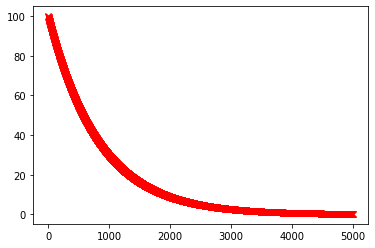

In [ ]:
from matplotlib import pyplot as plt
import math
def liste(N0,b,M):
    u=N0
    L=[]
    q=math.exp(-b)
    for k in range(0,M):
        L.append(u)
        u=q*u
        k=k+1
    n=0
    v=N0
    while L[n]>0.5*N0:
        n=n+1
    return plt.plot(L, 'rx'), print((n)*10)

liste(100,0.00121,5000)

We can also compare this graph with the exponential graph:

## Discretization of the continuous model and numerical solutions. 

We know the solution of the ODE above, but some more complicated equations (e.g., nuclear physics, chemistry) don't have a closed-form expression. In this case, one has to find a numerical approximation of the solution. The standard method is to discretize the time interval $[t_0,t]$ into small steps of duration $\delta t$, with $\delta t\ll t-t_0$. Say we have $n$ steps, with $n$ large, then $\delta t=\frac{t-t_0}{n}$. We can then calculate the rate of change of the number of nuclei $N(t)$ at the time $t_1 = t_0 + \delta t$, then at the time $t_2 = t_0 +2\delta t$, and so on, $t_k = t_0 +k\delta t$. 

This means that at each time $t_{k} = k\delta t$, the recursive relation can be written as:
$$
\frac{N(t_{k+1}-N(t_k))}{\delta t} = -\alpha N(t_{k})
$$
which can be rewritten as:
$$
N(t_{k+1}) = N(t_k) -\alpha N(t_{k})\cdot\delta t
$$
If we denote $u_k = N(t_{k})$ and $t_{k}=k\delta t$, we find:
$$
u_{k+1} = u_k -\alpha\cdot \delta t\cdot u_k = (1-\alpha\cdot\delta t)u_k\ ,
$$
which us nothing but a geometric sequence with a ratio $r = 1-\alpha\cdot\delta t$. 

In what follows, we are going to create a list of the values of the sequence $u_k$ for $\delta t$ small compared to the half-life so that we get a good approximation of the continuous model. 

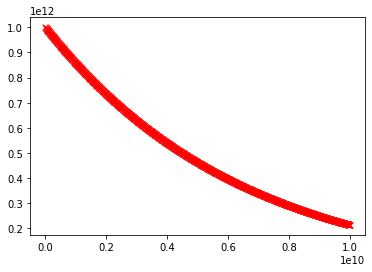

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def liste(N0,t12,n,tf):
    u=N0
    alpha=np.log(2)/t12
    t=0
    h=tf/n
    L=[]
    T=[]
    for k in range(0,n+1):
        L.append(u)
        T.append(t)
        u=u-alpha*u*h
        t=t+h
        k=k+1
    return plt.plot(T,L, 'rx')
    
liste(10**12,4.5*10**9,10**3,10*10**9)

## Problem

**Problem 2:** We go back to our first problem and use the continuous approach to find a more accurate solution. Let's remind the problem: we want to estimate the age of a prehistorical human skeleton using carbon-14 dating. In the sample, we measure that the number of carbon-14 atoms is about 10 times greater than the the number measured in a living human's bone. 
1. Write a code to graph the ratio of carbon-14 atoms in human skeleton as a function of time (we'll take $N_0=1$) using the continuous model. 
2. Write a program to find a lower and a upper bound of the age of the skeleton. 
3. Using the line graph, give a rough approximation of the age of the skeleton and compare with the previous answer. 